# # Lab Task1: Assess the flood effects in
sindh using clusterring
 -Load two images (before flood, and after flood)
 -Apply Clustering for both images
 -Creat masks for both images
 -count the number of pixels of water bodies in both images
 -Calculate the differnce
 -visualize the difference

In [32]:
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

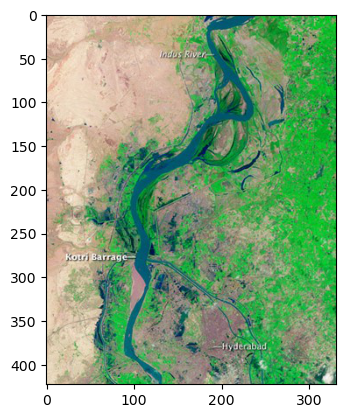

In [99]:
#before image
img_path1 = r"C:\Users\user\Desktop\before.jpg"
b_image = Image.open(img_path1)
plt.imshow(b_image,cmap="gray")

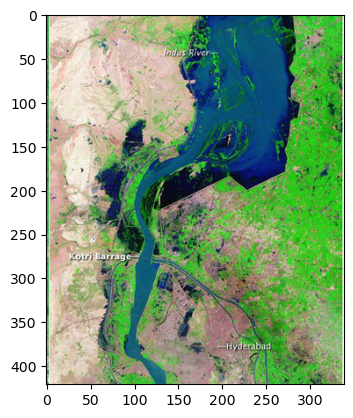

In [100]:
#after image
img_path2 = r"C:\Users\user\Desktop\after.jpg"
a_image = Image.open(img_path2)
plt.imshow(a_image,cmap="gray")

In [101]:
#before image
before_image = b_image.convert("L") # Convert to grayscale
#Convert PIL image to nmpy array
after_image = a_image.convert("L") # Convert to grayscale


In [102]:
# Get the dimensions of each image
width1, height1 = before_image.size
width2, height2 = after_image.size

# Determine the image to match the size with
target_width, target_height = width1, height1  # Choose image1 as the target size

# Resize image2 to match the target size
after_image = after_image.resize((target_width, target_height))

print(before_image.size )
print(after_image.size)

(331, 423)
(331, 423)


In [103]:
image_np1 = np.array(before_image)

# Reshape the image to a 1D array for K-means clustering
image_1d1 = image_np1.reshape(-1, 1)


In [104]:
#after image

#Convert PIL image to nmpy array
image_np2 = np.array(after_image)
# Reshape the image to a 1D array for K-means clustering
image_1d2 = image_np2.reshape(-1, 1)


In [105]:
image_np1.shape, image_1d1.shape

((423, 331), (140013, 1))

In [106]:
image_np2.shape, image_1d2.shape

((423, 331), (140013, 1))

In [107]:
#before image
#K-means clustering
n=3
kmeans = KMeans(n_clusters=n)
cluster_assignments2 = kmeans.fit_predict(image_1d2)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [108]:
#after image
#K-means clustering
#n=3
#kmeans = KMeans(n_clusters=n)
cluster_assignments1 = kmeans.predict(image_1d1)

In [109]:
#before image
# Reshape the cluster assignments back to the image shape
clustered_image_b = cluster_assignments1.reshape(image_np1.shape)
clustered_image_b.shape

(423, 331)

In [110]:
#after image
#Reshape the cluster assignments back to the image shape
clustered_image_a = cluster_assignments2.reshape(image_np2.shape)
clustered_image_a.shape


(423, 331)

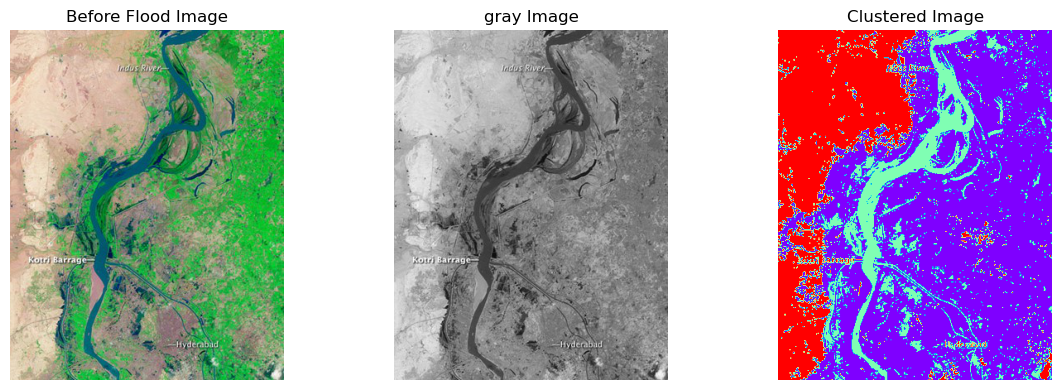

In [111]:
#plotting before flood
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(b_image, cmap='gray')
plt.title('Before Flood Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(image_np1, cmap='gray')
plt.title('gray Image')
plt.axis('off')
plt.subplot(133)
plt.imshow(clustered_image_b, cmap='rainbow')
plt.title('Clustered Image')
plt.axis('off')
plt.tight_layout()
plt.show()

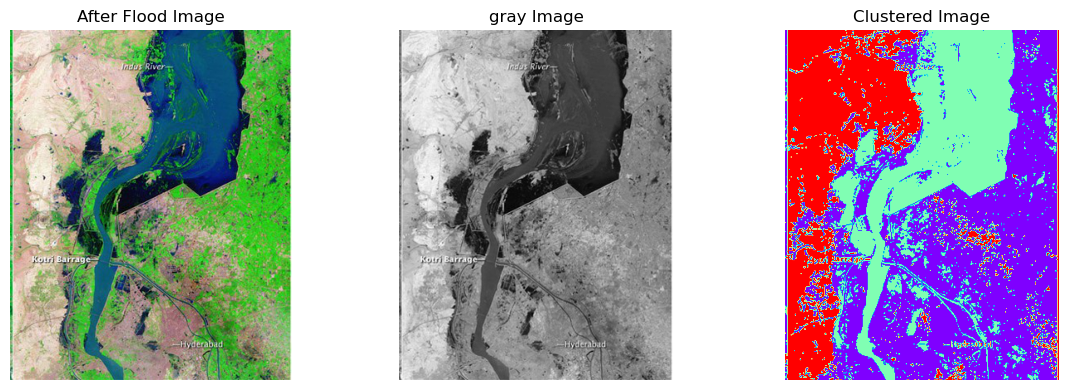

In [112]:
#plotting after flood
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(a_image, cmap='gray')
plt.title('After Flood Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(image_np2, cmap='gray')
plt.title('gray Image')
plt.axis('off')
plt.subplot(133)
plt.imshow(clustered_image_a, cmap='rainbow')
plt.title('Clustered Image')
plt.axis('off')
plt.tight_layout()
plt.show()

In [113]:
masks_before = []
for cluster_id in range(n):
 cluster_mask = (cluster_assignments1 == cluster_id).reshape(image_np1.shape)
 masks_before.append(cluster_mask)

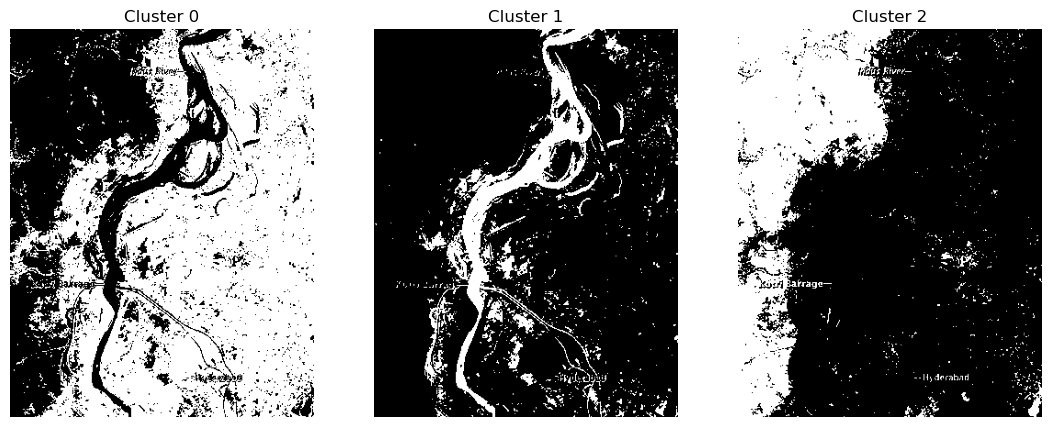

In [114]:
#plotting
plt.figure(figsize=(18, 12))
for i in range(n):
 plt.subplot(1, n + 1, i + 2)
 plt.imshow(masks_before[i], cmap='gray')
 plt.title(f'Cluster {i}')
 plt.axis('off')

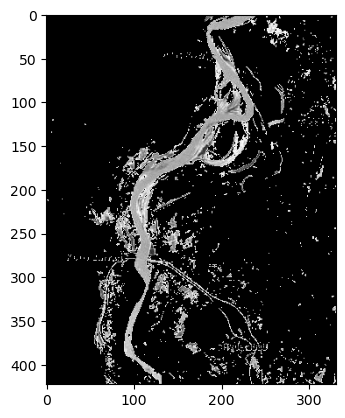

In [115]:
plt.imshow(image_np1*masks_before[1],cmap='gray')

In [116]:
#after masks
masks_after = []
for cluster_id in range(n):
 cluster_mask = (cluster_assignments2 == cluster_id).reshape(image_np2.shape)
 masks_after.append(cluster_mask)

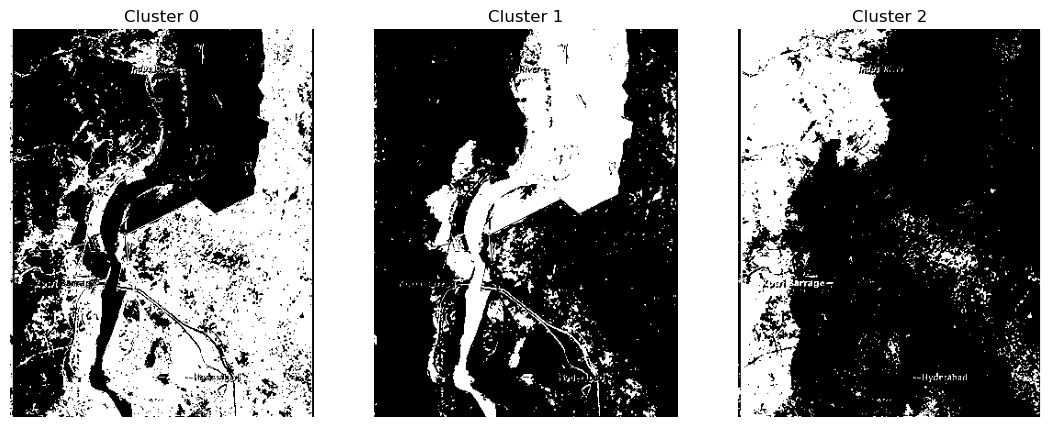

In [117]:
#plotting
plt.figure(figsize=(18, 12))
for i in range(n):
 plt.subplot(1, n + 1, i + 2)
 plt.imshow(masks_after[i], cmap='gray')
 plt.title(f'Cluster {i}')
 plt.axis('off')

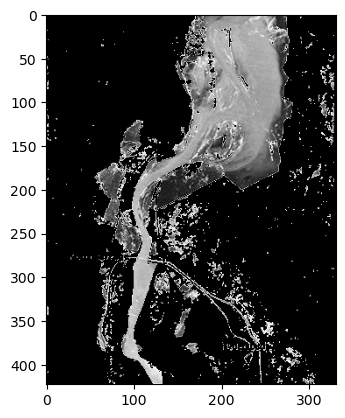

In [118]:
plt.imshow(image_np2*masks_after[1],cmap='gray')

In [119]:
water_pixels_before=np.sum(masks_before[1]==1)
water_pixels_before

17454

In [120]:
water_pixels_after=np.sum(masks_after[1]==1)
water_pixels_after

36337

(-0.5, 330.5, 422.5, -0.5)

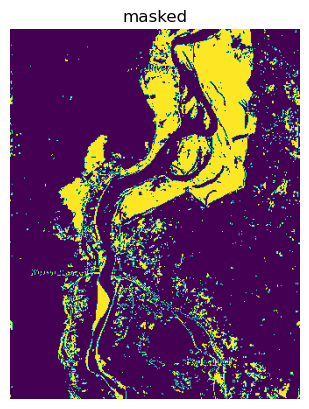

In [122]:
difference_masks=np.logical_xor(masks_after[1],masks_before[1])
plt.subplot(1,1,1)
plt.imshow(difference_masks)
plt.title(f"masked")
plt.axis("off")